## Import the necessary libraries

In [6]:

import pandas as pd
import numpy as np
from sklearn import svm
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline 

## Read the data as a data frame

In [7]:
# Read the data in dataframe
raw_data = pd.read_csv("vehicle.csv")

# Create copy of original data to work with, so that we can refrence original data in future
df = raw_data.copy()
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [14]:
df.shape

(846, 19)

In [8]:
df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr.axis_aspect_ratio           float64
max.length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr.axis_rectangularity         float64
max.length_rectangularity        int64
scaled_variance                float64
scaled_variance.1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration.1    float64
skewness_about                 float64
skewness_about.1               float64
skewness_about.2               float64
hollows_ratio                    int64
class                           object
dtype: object

In [13]:
df.isnull().sum()# If there are any null values in data set

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [33]:
# split dataset into inputs and outputs
from sklearn.preprocessing import Imputer

X = df.iloc[:, :-1]
y =  df.iloc[:, -1]

# fill missing values with mean column values




#from sklearn.impute import SimpleImputer
rep_0 = Imputer(missing_values='NaN', strategy='median', axis=0)
cols=X.columns
X = pd.DataFrame(rep_0.fit_transform(X.values))

X.columns = cols



D:\programX86\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [35]:
X.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64

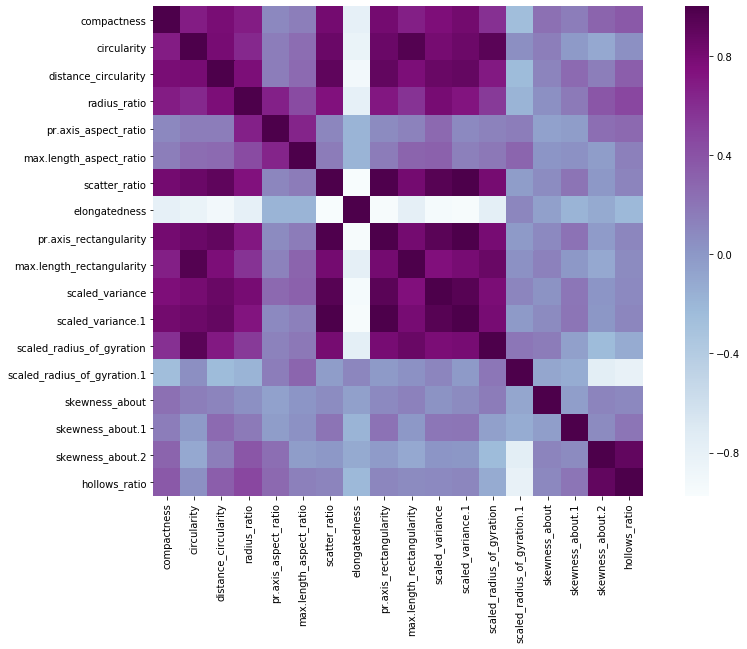

In [37]:
matrix = df[cols].corr()
f, ax = plt.subplots(figsize=(15, 9))
sns.heatmap(matrix, square=True, cmap="BuPu")

In [39]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Fitting data to  SVM classifier

In [44]:
# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
SVC_model = SVC(kernel = 'rbf')
SVC_model.fit(X_train, y_train)

ypred_SVC = SVC_model.predict(X_test)

D:\programX86\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [45]:
SVC_score = SVC_model.score(X_test, y_test)
print( '{:<{}s}'.format('SVC Classifier', 20) + ' \t\t '+ f'{round(SVC_score,3)}')

SVC Classifier       		 0.965


### Training SVM again with PCA

In [49]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [51]:
print(pca.explained_variance_ratio_)

[5.21860337e-01 1.67297684e-01 1.05626388e-01 6.54745969e-02
 5.08986889e-02 2.99641300e-02 1.99136623e-02 1.23150069e-02
 8.91215289e-03 5.09714695e-03 3.69004485e-03 2.58586200e-03
 1.98624491e-03 1.52109243e-03 1.14194232e-03 9.94191854e-04
 5.56329946e-04 1.64497408e-04]


In [53]:
# from above we can see we need 8 principle componests to explaiin 95% of variation

In [56]:
pca8 = PCA(n_components=3)
pca8.fit(X)
X_train_pca = pca8.transform(X_train)
X_test_pca = pca8.transform(X_test)

In [58]:
SVC_model_pca = SVC(kernel = 'rbf')
SVC_model_pca.fit(X_train_pca, y_train)

ypred_SVC = SVC_model_pca.predict(X_test_pca)

D:\programX86\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [60]:
SVC_score = SVC_model_pca.score(X_test_pca, y_test)
print( '{:<{}s}'.format('SVC Classifier', 20) + ' \t\t '+ f'{round(SVC_score,3)}')

SVC Classifier       		 0.729


## we see a little reduction in accuracy but we are only using 8 independent variable instead of 18 before.